# Лабораторная работа 1. Введение в машинное обучение. Обучение с учителем. Задача регрессии

<b>Традиционное предупреждение для всех лабораторных работ:</b> перед обучением моделей необходимо выполнить предварительную обработку данных, которая <b>обязательно</b> включает в себя:
- заполнение пропущенных значений (рекомедуется логика заполнения пропусков на основе типа данных, которая использовалась в РГР по Практикуму);
- преобразование категориальных признаков в числовые (используйте one-hot кодирование или map; используйте знания с Практикума).

Предобработка может включать в себя другие действия, но выполнение описанных выше действий обязательно.

Сделайте это один раз и сохраните в отдельный csv файл, а потом его используйте.

<b>Выполните следующие задания:</b>
- загрузите датасет для регрессии, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- вычислите значения метрик $R^2$, MAE, MSE, RMSE, MAPE для всех обученных моделей; выберите лучшую модель;
- самостоятельно реализуйте (желательно в виде класса) модель линейной регрессии с регуляризацией (можете выбрать L1 или L2);
- самостоятельно реализуйте вычисление всех используемых метрик (в виде функций, принимающих два аргумента);
- обучите вашу модель линейной регрессии на ваших данных; оцените качество с помощью реализованных вами метрик.

## Решение:

В файле *prepare_wine_data.ipynb* были заранее объеденены датасеты *winequality-red.csv* и *winequality-white.csv* в единый: *winequality.csv*. 

Было добавлено поле с типом вина.

#### Импортируем необходимые модули

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, accuracy_score
from math import sqrt

#### Загружаем датасет

In [2]:
data = pd.read_csv('../data/winequality.csv', sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


#### Преобразуем категориальный признак в числовой и проверяем данные на пустые значения

In [3]:
data['wine type'] = data['wine type'].map({'red': 0, 'white': 1})
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [4]:
data.isnull().all()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
wine type               False
dtype: bool

Пустых значений нет

#### Выделяем целевой признак и предикторы

In [5]:
y = data['quality']
X = data.drop(['quality'], axis=1)

In [6]:
display(y, X)

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


#### Разбиваем данные на обучающую и тестовую выборки

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5197, 12), (5197,), (1300, 12), (1300,))

#### Решаем задачу регрессии с использованием моделей sklearn (линейная регрессия + L1, L2)

In [8]:
def print_metrics(y_test, y_pred):
    print(
        f'MAE: {mean_absolute_error(y_test, y_pred)}\n'
        f'MSE: {mean_squared_error(y_test, y_pred)}\n'
        f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}\n'
        f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}\n'
        f'R^2: {r2_score(y_test, y_pred)}'
    )

##### Модель линейной регрессии

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [10]:
print_metrics(y_test, y_pred)
lr.coef_

MAE: 0.581447244121327
MSE: 0.570002794478094
RMSE: 0.754985294213135
MAPE: 0.10271568268741209
R^2: 0.2530297990502762


array([ 7.93509015e-02, -1.52954838e+00, -1.03479604e-01,  5.96490399e-02,
       -8.40354524e-01,  5.94057938e-03, -1.43989997e-03, -9.61762215e+01,
        5.15390002e-01,  6.88015203e-01,  2.36424201e-01, -3.69252364e-01])

##### Модель линейной регрессии c регуляризацией L1 (Lasso)

In [11]:
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print_metrics(y_test, y_pred)
lasso.coef_

MAE: 0.617881278275854
MSE: 0.6283558887857547
RMSE: 0.7926890240098917
MAPE: 0.10987651883805177
R^2: 0.17655995889634934


array([-0.        , -0.        ,  0.        ,  0.0082669 , -0.        ,
        0.00850162, -0.00122673, -0.        , -0.        ,  0.        ,
        0.27906817,  0.        ])

Подбираем гиперпараметр

In [12]:
params = {'alpha': np.arange(0, 1, 0.05)}

Пробуем GridSearchCV

In [13]:
lasso_opt = GridSearchCV(Lasso(), params).fit(X_train, y_train)

c:\Users\podov\Desktop\Andrey\Универ\Машинное обучение\ml-labs\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\podov\Desktop\Andrey\Универ\Машинное обучение\ml-labs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\podov\Desktop\Andrey\Универ\Машинное обучение\ml-labs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.104e+03, tolerance: 3.175e-01 Linear regression models with null weight for the l1 regularizatio

In [14]:
lasso_opt.best_params_

{'alpha': 0.0}

and RandomizedSearchCV

In [15]:
lasso_opt = RandomizedSearchCV(Lasso(), params).fit(X_train, y_train)

In [16]:
lasso_opt.best_params_, lasso_opt.best_score_

({'alpha': 0.1}, 0.22195706088174214)

##### Модель линейной регрессии c регуляризацией L2 (Ridge)

In [17]:
ridge = Ridge(alpha=0.5).fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print_metrics(y_test, y_pred)
ridge.coef_

MAE: 0.5847313456392471
MSE: 0.5764168636639048
RMSE: 0.7592212218213508
MAPE: 0.10326448639488119
R^2: 0.24462436912073127


array([-6.29292615e-04, -1.58826351e+00, -1.34094322e-01,  2.29864727e-02,
       -9.47165807e-01,  6.64052534e-03, -1.77479461e-03, -4.10989733e-01,
        1.42908794e-01,  5.56454224e-01,  3.41118549e-01, -1.62937881e-01])

Подбираем гиперпараметр

Пробуем GridSearchCV

In [18]:
ridge_opt = GridSearchCV(Ridge(), params).fit(X_train, y_train)

In [19]:
ridge_opt.best_params_, ridge_opt.best_score_

({'alpha': 0.0}, 0.30138721744616953)

and RandomizedSearchCV

In [20]:
ridge_opt = RandomizedSearchCV(Ridge(), params).fit(X_train, y_train)

In [21]:
ridge_opt.best_params_, ridge_opt.best_score_

({'alpha': 0.2}, 0.29762542245979606)

#### Решаем задачу регрессии с использованием моделей sklearn (полиномиальная регрессия + L1, L2)

In [22]:
pf = PolynomialFeatures(2)
X_p = pf.fit_transform(X)
X_p

array([[  1.  ,   7.4 ,   0.7 , ...,  88.36,   0.  ,   0.  ],
       [  1.  ,   7.8 ,   0.88, ...,  96.04,   0.  ,   0.  ],
       [  1.  ,   7.8 ,   0.76, ...,  96.04,   0.  ,   0.  ],
       ...,
       [  1.  ,   6.5 ,   0.24, ...,  88.36,   9.4 ,   1.  ],
       [  1.  ,   5.5 ,   0.29, ..., 163.84,  12.8 ,   1.  ],
       [  1.  ,   6.  ,   0.21, ..., 139.24,  11.8 ,   1.  ]])

In [23]:
X_p.shape, X.shape

((6497, 91), (6497, 12))

In [24]:
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X_p, y, test_size=0.2)
X_p_train.shape, X_p_test.shape, y_p_train.shape, y_p_test.shape

((5197, 91), (1300, 91), (5197,), (1300,))

##### Модель полиномиальной регрессии

In [25]:
lr_p = LinearRegression().fit(X_p_train, y_p_train)
y_p_pred = lr_p.predict(X_p_test)

In [26]:
print_metrics(y_p_test, y_p_pred)

MAE: 0.5592944583362502
MSE: 0.7402013722768483
RMSE: 0.86034956400108
MAPE: 0.09979261863734501
R^2: 0.021537894221030585


##### Модель полиномиальной регрессии c регуляризацией L1 (Lasso)

In [27]:
lasso_p = Lasso(alpha=0.3).fit(X_p_train, y_p_train)
y_p_pred = lasso_p.predict(X_p_test)
print_metrics(y_p_test, y_p_pred)

MAE: 0.5809878062419863
MSE: 0.5746335271249151
RMSE: 0.7580458608322554
MAPE: 0.10378653648924605
R^2: 0.2403997721966573


In [ ]:
lasso_p_opt = GridSearchCV(Lasso(), params).fit(X_p_train, y_p_train)

In [30]:
lasso_p_opt.best_params_
print_metrics(y_p_test, y_p_pred)

MAE: 0.5673416441032877
MSE: 0.5137571709125421
RMSE: 0.7167685616100514
MAPE: 0.09933272749866909
R^2: 0.293468974187136


##### Модель полиномиальной регрессии c регуляризацией L2 (Ridge)

In [25]:
ridge_p = Ridge(alpha=0.3).fit(X_p_train, y_p_train)
y_p_pred = ridge_p.predict(X_p_test)
print_metrics(y_p_test, y_p_pred)

MAE: 0.5492368234259608
MSE: 0.4861734895304933
RMSE: 0.697261421226281
MAPE: 0.09772189667553748
R^2: 0.3526466296939035


In [26]:
ridge_p_opt = GridSearchCV(Ridge(), params).fit(X_p_train, y_p_train)

In [27]:
ridge_p_opt.best_params_

{'alpha': 0.0}

#### Лучшая модель: полиномиальная с L2 (Ridge)

#### Реализация модели линейной регрессии с регуляризацией L2 (Ridge)
- самостоятельно реализуйте (желательно в виде класса) модель линейной регрессии с регуляризацией (можете выбрать L1 или L2);
- самостоятельно реализуйте вычисление всех используемых метрик (в виде функций, принимающих два аргумента);
- обучите вашу модель линейной регрессии на ваших данных; оцените качество с помощью реализованных вами метрик.

In [28]:
import sys
import os
from pathlib import Path

if (dir := str(Path(os.getcwd()).parent)) not in sys.path:
    sys.path.append(dir)
sys.path

['c:\\Users\\podov\\Desktop\\Andrey\\Универ\\Машинное обучение\\ml-labs\\notebooks',
 'C:\\Users\\podov\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip',
 'C:\\Users\\podov\\AppData\\Local\\Programs\\Python\\Python39\\DLLs',
 'C:\\Users\\podov\\AppData\\Local\\Programs\\Python\\Python39\\lib',
 'C:\\Users\\podov\\AppData\\Local\\Programs\\Python\\Python39',
 'c:\\Users\\podov\\Desktop\\Andrey\\Универ\\Машинное обучение\\ml-labs\\venv',
 '',
 'c:\\Users\\podov\\Desktop\\Andrey\\Универ\\Машинное обучение\\ml-labs\\venv\\lib\\site-packages',
 'c:\\Users\\podov\\Desktop\\Andrey\\Универ\\Машинное обучение\\ml-labs\\venv\\lib\\site-packages\\win32',
 'c:\\Users\\podov\\Desktop\\Andrey\\Универ\\Машинное обучение\\ml-labs\\venv\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\podov\\Desktop\\Andrey\\Универ\\Машинное обучение\\ml-labs\\venv\\lib\\site-packages\\Pythonwin',
 'c:\\Users\\podov\\Desktop\\Andrey\\Универ\\Машинное обучение\\ml-labs']

In [29]:
from mylib.ridge import Ridge as L2
from mylib.metrics import Metrics

Проверка метрик на данных выше

In [30]:
Metrics(y_p_test, y_p_pred)()

MAE:	0.5492368234259608
MSE:	0.4861734895304933
RMSE:	0.697261421226281
MAPE:	0.09772189667553748
R^2:	0.3526466296939035


In [31]:
y = data['quality']
X = data.drop(['quality'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3248, 12), (3248,), (3249, 12), (3249,))

In [32]:
ridge = L2(np.array(X_train), np.array(y_train), alpha=0.0, eps=0.01, y_test=y_test, X_test=np.c_[np.ones(len(X_test)), X_test])

In [33]:
ridge.fit()

Iter 50	R^2: -18531101.84511636
Iter 100	R^2: -4526968.07260018
Iter 150	R^2: -1992913.3071862727
Iter 200	R^2: -1114131.923183471
Iter 250	R^2: -709617.973113222
Iter 300	R^2: -490749.82736049104
Iter 350	R^2: -359194.4432687394
Iter 400	R^2: -274038.32361074537
Iter 450	R^2: -215794.18571133548
Iter 500	R^2: -174222.9461483515
Iter 550	R^2: -143527.28656520223
Iter 600	R^2: -120225.59381397894
Iter 650	R^2: -102124.815890557
Iter 700	R^2: -87787.99383064223
Iter 750	R^2: -76241.83249803625
Iter 800	R^2: -66808.17022008762
Iter 850	R^2: -59002.79936345201
Iter 900	R^2: -52472.54902571894
Iter 950	R^2: -46954.94687453452
Iter 1000	R^2: -42251.654386146285
Iter 1050	R^2: -38210.55256380372
Iter 1100	R^2: -34713.403017843215
Iter 1150	R^2: -31667.186442673534
Iter 1200	R^2: -28997.91753282872
Iter 1250	R^2: -26646.159189178903
Iter 1300	R^2: -24563.722804065277
Iter 1350	R^2: -22711.20939552452
Iter 1400	R^2: -21056.155407096856
Iter 1450	R^2: -19571.619070730074
Iter 1500	R^2: -18235.09

In [34]:
Metrics(y_test, np.dot(np.c_[np.ones(X_test.shape[0]), X_test], ridge.get_w()))()
# Metrics(y_test, np.dot(X_test, ridge.get_w()[1:]))()

MAE:	28.033038202464187
MSE:	1045.07877828982
RMSE:	32.327678207533246
MAPE:	4.965863170541533
R^2:	-1329.6426574497586


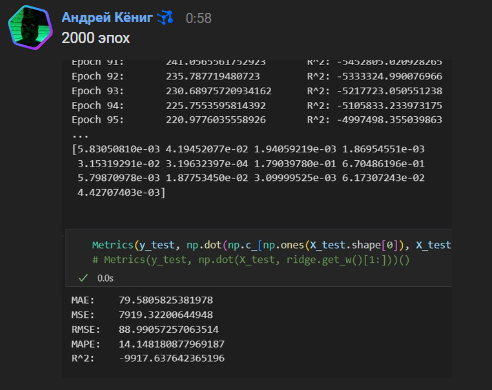

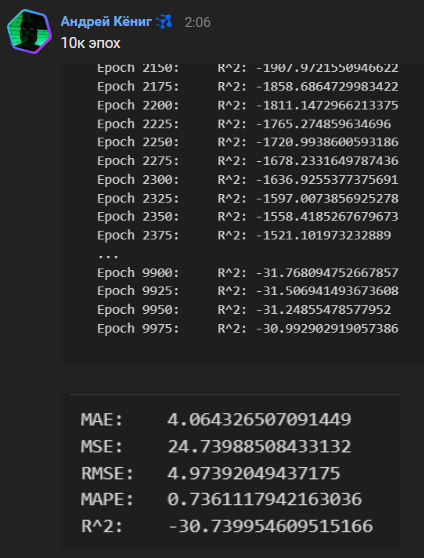

15000 эпох - R^2: -8,..

In [35]:
ridge.get_w().tolist()

[0.002326820043811718,
 0.01677200587900829,
 0.0007764847304436272,
 0.0007432237679062899,
 0.012622807812794075,
 0.00012831285468916441,
 0.07133218515624307,
 0.26921511149520544,
 0.0023142016993300185,
 0.0074903416643919835,
 0.0012404586828695776,
 0.024572985615185405,
 0.0017651313513934314]

In [36]:
a10000 = [0.0005831556062010142, 0.004207894619511206, 0.00019388622975598054, 0.0001862258270161984, 0.0031823302404132008, 3.147118899082027e-05, 0.017992439638052474, 0.06738986706552429, 0.0005799858926779376, 0.001876983880654076, 0.00030905492027035207, 0.006167454799667152, 0.00044333251059096063]
# коэфы при t=10000
a10000

[0.0005831556062010142,
 0.004207894619511206,
 0.00019388622975598054,
 0.0001862258270161984,
 0.0031823302404132008,
 3.147118899082027e-05,
 0.017992439638052474,
 0.06738986706552429,
 0.0005799858926779376,
 0.001876983880654076,
 0.00030905492027035207,
 0.006167454799667152,
 0.00044333251059096063]

In [37]:
a11850 = [0.00035371075390846227,
 0.0026868032659829425,
 0.00013625008533083518,
 0.00010320996893709257,
 0.001007463213546249,
 2.1626101932895124e-05,
 0.006315379433358243,
 0.020818609683778626,
 0.0003516078077226528,
 0.001152307412721723,
 0.00020028266828402288,
 0.003911752685851854,
 0.00017189666659104456]

In [38]:
a13990 = [0.0005794872691599523,
 0.004342573309062414,
 0.00021603626925904544,
 0.0001729111871063928,
 0.002009213928792359,
 3.464114785480587e-05,
 0.012165352998524701,
 0.04189654457504684,
 0.0005761166053516315,
 0.0018832399039194901,
 0.00032451240990094614,
 0.006340908719903635,
 0.0003185256898366951]

In [39]:
a15000 = [0.0006092385244053693,
 0.0046225533382514,
 0.00023502487792770354,
 0.00017852134576287705,
 0.0017674952450035745,
 3.749354575230174e-05,
 0.010879119419118774,
 0.035778443300405326,
 0.0006056402239344057,
 0.001985168044996785,
 0.0003475593979131137,
 0.00673558706528759,
 0.0002942681389635051]